# Notasi
 * **24C5** = convolutional layer 24 feature maps dg 5x5 filter, stride 1
 * **24C5S2** = convolutional layer 24 feature maps dg 5x5 filter, stride 2 
 * **P2** = max pooling 2x2 filter, stride 2
 * **256** = fully connected dense layer 256 units 
 

   

In [8]:
!pip install python-mnist

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
mxnet 1.3.0.post0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.15.1 which is incompatible.
kmodes 0.9 has requirement scikit-learn<0.20.0,>=0.19.0, but you'll have scikit-learn 0.21.dev0 which is incompatible.
kmeans-smote 0.1.0 has requirement imbalanced-learn<0.4,>=0.3.1, but you'll have imbalanced-learn 0.4.0.dev0 which is incompatible.
kmeans-smote 0.1.0 has requirement numpy<1.15,>=1.13, but you'll have numpy 1.15.1 which is incompatible.
kmeans-smote 0.1.0 has requirement scikit-learn<0.20,>=0.19.0, but you'll have scikit-learn 0.21.dev0 which is incompatible.
keras 2.2.2 has requirement keras-applications==1.0.4, but you'll have keras-applications 1.0.5 which is incompatible.
keras 2.2.2 has requirement keras-preprocessing==1.0.2, but you'll have keras-preprocessing 1.0.3 which is incompatible.
anaconda-client 1.7.2 has requirement python-dateutil>=2.6.1, but you'll have python-dateutil 2.6.0 whi

# **Menggunakan EMNIST Berformat CSV**

In [10]:
# LOAD LIBRARIES
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# LOAD THE DATA
training_letter = pd.read_csv("../input/emnist/emnist-mnist-train.csv")
testing_letter = pd.read_csv("../input/emnist/emnist-mnist-test.csv")



# #training_labels
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)
# #testing_labels
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)

train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

number_of_classes = 10

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

# GLOBAL VARIABLES
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

# 1. Berapa pasang convolutional-pooling?
 * 784 - **[24C5-P2]** - 256 - 10
 * 784 - **[24C5-P2] - [48C5-P2]** - 256 - 10
 * 784 - **[24C5-P2] - [48C5-P2] - [64C5-P2]** - 256 - 10
   

In [11]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 3
model = [0] *nets

for j in range(3):
    model[j] = Sequential()
    model[j].add(Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    if j>0:
        model[j].add(Conv2D(48,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D())
    if j>1:
        model[j].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
# CREATE VALIDATION SET
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2)
# TRAIN NETWORKS
history = [0] * nets
names = ["(C-P)x1","(C-P)x2","(C-P)x3"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(train_x,train_y, batch_size=80, epochs = epochs, 
                              validation_data=(test_x,test_y), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

CNN (C-P)x1: Epochs=20, Train accuracy=0.99996, Validation accuracy=0.99167
CNN (C-P)x2: Epochs=20, Train accuracy=0.99996, Validation accuracy=0.99325
CNN (C-P)x3: Epochs=20, Train accuracy=0.99981, Validation accuracy=0.99442


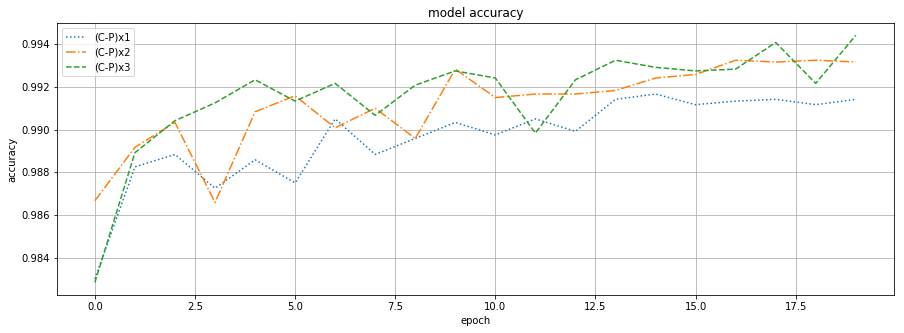

In [13]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_acc'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
# axes.set_ylim([0.90,1])
plt.grid()
plt.show()

# 2. Berapa banyak peta fitur?
 * 784 - [**8**C5-P2] - [**16**C5-P2] - 256 - 10
 * 784 - [**16**C5-P2] - [**32**C5-P2] - 256 - 10
 * 784 - [**24**C5-P2] - [**48**C5-P2] - 256 - 10
 * 784 - [**32**C5-P2] - [**64**C5-P2] - 256 - 10
 * 784 - [**48**C5-P2] - [**96**C5-P2] - 256 - 10
 * 784 - [**64**C5-P2] - [**128**C5-P2] - 256 - 10

In [14]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 6
model = [0] *nets
for j in range(6):
    model[j] = Sequential()
    model[j].add(Conv2D(j*8+8,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Conv2D(j*16+16,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [15]:
# CREATE VALIDATION SET
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2)
# TRAIN NETWORKS
history = [0] * nets
names = ["8 maps","16 maps","24 maps","32 maps","48 maps","64 maps"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(train_x,train_y, batch_size=80, epochs = epochs, 
                              validation_data=(test_x,test_y), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

CNN 8 maps: Epochs=20, Train accuracy=0.99981, Validation accuracy=0.99150
CNN 16 maps: Epochs=20, Train accuracy=0.99998, Validation accuracy=0.99383
CNN 24 maps: Epochs=20, Train accuracy=0.99998, Validation accuracy=0.99408
CNN 32 maps: Epochs=20, Train accuracy=0.99998, Validation accuracy=0.99408
CNN 48 maps: Epochs=20, Train accuracy=0.99998, Validation accuracy=0.99442
CNN 64 maps: Epochs=20, Train accuracy=0.99998, Validation accuracy=0.99392


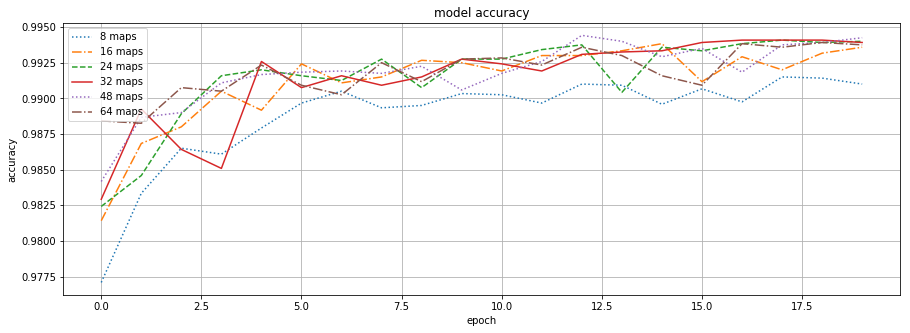

In [16]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_acc'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
# axes.set_ylim([0.90,1])
plt.grid()
plt.show()

# 3. Berapa ukuran dense layer?
 * 784 - [32C5-P2] - [64C5-P2] - **0** - 10
 * 784 - [32C5-P2] - [64C5-P2] - **32** - 10
 * 784 - [32C5-P2] - [64C5-P2] - **64** - 10
 * 784 - [32C5-P2] - [64C5-P2] - **128** -10
 * 784 - [32C5-P2] - [64C5-P2] - **256** - 10
 * 784 - [32C5-P2] - [64C5-P2] - **512** -10
 * 784 - [32C5-P2] - [64C5-P2] - **1024** - 10
 * 784 - [32C5-P2] - [64C5-P2] - **2048** - 10

# Experiment 3

In [17]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Flatten())
    if j>0:
        model[j].add(Dense(2**(j+4), activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [18]:
# CREATE VALIDATION SET
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2)
# TRAIN NETWORKS
history = [0] * nets
names = ["0N","32N","64N","128N","256N","512N","1024N","2048N"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(train_x,train_y, batch_size=80, epochs = epochs, 
                              validation_data=(test_x,test_y), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

CNN 0N: Epochs=20, Train accuracy=0.99994, Validation accuracy=0.99192
CNN 32N: Epochs=20, Train accuracy=0.99996, Validation accuracy=0.99358
CNN 64N: Epochs=20, Train accuracy=0.99996, Validation accuracy=0.99300
CNN 128N: Epochs=20, Train accuracy=0.99996, Validation accuracy=0.99250
CNN 256N: Epochs=20, Train accuracy=0.99998, Validation accuracy=0.99417
CNN 512N: Epochs=20, Train accuracy=0.99996, Validation accuracy=0.99375
CNN 1024N: Epochs=20, Train accuracy=0.99990, Validation accuracy=0.99342
CNN 2048N: Epochs=20, Train accuracy=0.99998, Validation accuracy=0.99408


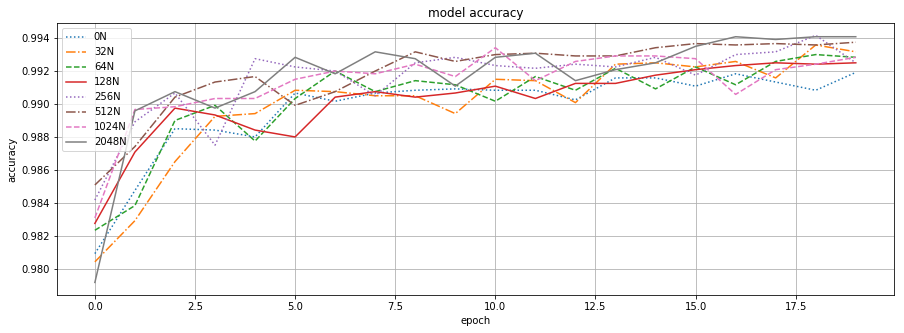

In [19]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_acc'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
# axes.set_ylim([0.98,1])
plt.grid()
plt.show()

# 4. Seberapa besar dropout?
 * 0%, 10%, 20%, 30%, 40%, 50%, 60%, or 70%

# Experiment 4

In [20]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS PAKE 20148 DENSE
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dropout(j*0.1))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [21]:
# CREATE VALIDATION SET
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2)
# TRAIN NETWORKS
history = [0] * nets
names = ["D=0","D=0.1","D=0.2","D=0.3","D=0.4","D=0.5","D=0.6","D=0.7"]
epochs = 30
for j in range(nets):
    history[j] = model[j].fit(train_x,train_y, batch_size=80, epochs = epochs, 
                              validation_data=(test_x,test_y), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

CNN D=0: Epochs=30, Train accuracy=0.99998, Validation accuracy=0.99325
CNN D=0.1: Epochs=30, Train accuracy=0.99985, Validation accuracy=0.99442
CNN D=0.2: Epochs=30, Train accuracy=0.99944, Validation accuracy=0.99442
CNN D=0.3: Epochs=30, Train accuracy=0.99881, Validation accuracy=0.99433
CNN D=0.4: Epochs=30, Train accuracy=0.99710, Validation accuracy=0.99417
CNN D=0.5: Epochs=30, Train accuracy=0.99475, Validation accuracy=0.99475
CNN D=0.6: Epochs=30, Train accuracy=0.98971, Validation accuracy=0.99392
CNN D=0.7: Epochs=30, Train accuracy=0.98258, Validation accuracy=0.99200


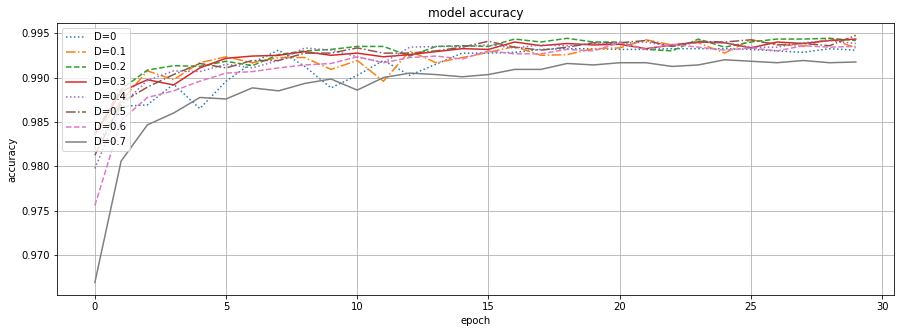

In [22]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_acc'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
# axes.set_ylim([0.98,1])
plt.grid()
plt.show()

# 5. Fitur lanjutan

 * ganti '32C5' dg '32C3-32C3'  
 * ganti 'P2' dg '32C5S2'
 * batch normalization
 * data augmentation

In [23]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 5
model = [0] *nets

j=0
model[j] = Sequential()

model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.5))
model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))
model[j].add(Flatten())
model[j].add(Dense(256, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=1
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))
model[j].add(Flatten())
model[j].add(Dense(256, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=2
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Flatten())
model[j].add(Dense(256, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=3
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))
model[j].add(Flatten())
model[j].add(Dense(256, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [24]:
j=4
model[j] = Sequential()

model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))

model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))

model[j].add(Flatten())
model[j].add(Dense(256, activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))

model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [26]:
# CREATE VALIDATION SET
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2)
# TRAIN NETWORKS 1,2,3,4
history = [0] * nets
names = ["basic","32C3-32C3","32C5S2","both+BN","both+BN+DA"]
epochs = 35
for j in range(nets-1):
    history[j] = model[j].fit(train_x,train_y, batch_size=80, epochs = epochs, 
                              validation_data=(test_x,test_y), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))
    
# CREATE MORE TRAINING IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1)
# TRAIN NETWORK 5
j = nets-1
history[j] = model[j].fit_generator(datagen.flow(train_x,train_y, batch_size=64), 
    epochs = epochs, steps_per_epoch = train_x.shape[0]//64,
    validation_data = (test_x,test_y), callbacks=[annealer], verbose=0)
print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
    names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

CNN basic: Epochs=35, Train accuracy=0.99779, Validation accuracy=0.99792
CNN 32C3-32C3: Epochs=35, Train accuracy=0.99854, Validation accuracy=0.99617
CNN 32C5S2: Epochs=35, Train accuracy=0.99925, Validation accuracy=0.99550
CNN both+BN: Epochs=35, Train accuracy=0.99919, Validation accuracy=0.99625
CNN both+BN+DA: Epochs=35, Train accuracy=0.99616, Validation accuracy=0.99775


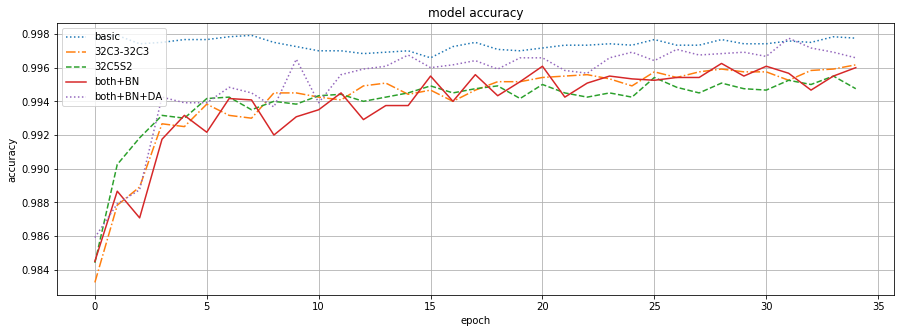

In [27]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_acc'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
# axes.set_ylim([0.98,1])
plt.grid()
plt.show()